리뷰데이터 가져오기 / 전처리 

In [1]:
# 기본 패키지 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 글꼴 경로 지정
font_path = '../../../../data/malgun.ttf'

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

# 데이터 불러오기

path = '../../../../data/Airbnb_London/reviews.csv'


df_review = pd.read_csv(path, encoding='utf-8')

df_review = df_review[['listing_id','date','comments']]

df_review = df_review.rename(columns= {
    'listing_id' : '숙소_id',
    'date': '리뷰날짜',
    'comments' : '리뷰'
})

#date >> 데이터타입 변경 datatime

df_review['리뷰날짜'] = pd.to_datetime(df_review['리뷰날짜'])

df_review.dropna(subset=['리뷰','리뷰날짜'], inplace=True)

#br/ 을 포함하고 있는 리뷰 >> br/을 공백(띄어쓰기)로 변경
df_review['리뷰'] = df_review['리뷰'].str.replace('<br/>', ' ', regex=False)

df_review['숙소_id'] = df_review['숙소_id'].astype(int)


#다른 나라 언어 삭제
path = '../../../../data/Airbnb_London_review/Not_englush_reviews.csv'

df_lang = pd.read_csv(path, encoding='utf-8')

df_lang.rename(columns={'not_english_reivew':'다른언어리뷰'}, inplace=True)
matching_rows = df_review[df_review['리뷰'].isin(df_lang['다른언어리뷰'])]
df_review = df_review.drop(matching_rows.index)


C:\Users\Master\AppData\Local\Temp\ipykernel_7640\1991688561.py:31: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_review = pd.read_csv(path, encoding='utf-8')


In [2]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890313 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   숙소_id   890313 non-null  int32         
 1   리뷰날짜    890313 non-null  datetime64[ns]
 2   리뷰      890313 non-null  object        
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 23.8+ MB


In [3]:
df_review.head()

,숙소_id,리뷰날짜,리뷰
0,13913,2010-08-18,My girlfriend and I hadn't known Alina before ...
1,13913,2011-07-11,Alina was a really good host. The flat is clea...
2,13913,2011-09-13,Alina is an amazing host. She made me feel rig...
3,13913,2011-10-03,"Alina's place is so nice, the room is big and ..."
4,13913,2011-10-09,"Nice location in Islington area, good for shor..."


언어감지 모듈(langdetect)를 이용하여 영어가 아닌 리뷰 찾기 (1시간30분걸림..)

In [4]:
# !pip install langdetect

In [5]:
# from langdetect import detect

# # 예시 리뷰 데이터
# comments = df['comments']

# # 영어가 아닌 리뷰를 담을 리스트
# non_english_reviews = []

# # 언어를 감지하고, 영어가 아닌 리뷰를 추출
# for comment in comments:
#     try:
#         lang = detect(comment)
#         if lang != 'en':  # 영어가 아닌 리뷰인 경우
#             non_english_reviews.append(comment)
#     except:
#         pass

# # 영어가 아닌 리뷰 출력
# print("Non-English Reviews:")
# for review in non_english_reviews:
#     print("-", review.count())


숙소 데이터 가져오기 / 전처리

In [6]:
# 기본 패키지 불러오기 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
import matplotlib as mpl
from matplotlib import font_manager, rc

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 글꼴 경로 지정
font_path = '../../../../data/malgun.ttf'  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

# 데이터 불러오기

path = '../../../../data/Airbnb_London/listings.csv'

london_lists = pd.read_csv(path)

# 1차 선별한 컬럼 25개 중 22개 2차 선별 + 1개(숙소_예약가능_여부)
# 최근 리뷰가 작성되었는지를 보기 위해 2개 컬럼 추가_240529 >> 'number_of_reviews_ltm' // 'last_review'
# URL 컬럼 london_lists에 적용_240530

columns_selected = ['id', 'listing_url', 'host_id', 'host_is_superhost', 'neighbourhood_cleansed', 'property_type', \
    'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'has_availability', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'last_review', 'review_scores_rating', 'review_scores_accuracy', \
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']

# 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'minimum_nights', 'maximum_nights', 'has_availability',

# 선별한 컬럼만 적용
london_lists = london_lists[columns_selected]

# 변수 정리 
london_lists = london_lists.rename(columns={
    'id': '숙소_id',
    'listing_url' : '숙소_url',
    'host_id': '호스트_id',
    # 'host_response_time': '답변_평균시간',
    # 'host_response_rate': '문의_응답률',
    # 'host_acceptance_rate': '예약_수락률',
    'host_is_superhost': '슈퍼호스트',
    # 'host_total_listings_count': '숙소_수',
    # 'host_has_profile_pic' : '프로필_사진',
    # 'host_identity_verified' : '호스트_신원',
    'neighbourhood_cleansed': '숙소_지역',
    'property_type' : '숙소_특징',
    'room_type': '숙소_유형',
    'accommodates': '수용_인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    # 'minimum_nights': '최소_숙박일',
    # 'maximum_nights': '최대_숙박일',
    'has_availability' : '예약가능여부',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_ltm' : '12개월리뷰수',
    'number_of_reviews_l30d': '30일리뷰수',
    'last_review' : '마지막리뷰',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'
 
})

temp = london_lists.copy()
raw = london_lists.copy()

# 컬럼명 확인
london_lists.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90852 entries, 0 to 90851
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        90852 non-null  int64  
 1   숙소_url       90852 non-null  object 
 2   호스트_id       90852 non-null  int64  
 3   슈퍼호스트        90463 non-null  object 
 4   숙소_지역        90852 non-null  object 
 5   숙소_특징        90852 non-null  object 
 6   숙소_유형        90852 non-null  object 
 7   수용_인원수       90852 non-null  int64  
 8   욕실수          57894 non-null  float64
 9   침실수          78118 non-null  float64
 10  침대수          57837 non-null  float64
 11  편의시설         90852 non-null  object 
 12  숙소_가격        57885 non-null  object 
 13  예약가능여부       86773 non-null  object 
 14  리뷰수          90852 non-null  int64  
 15  12개월리뷰수      90852 non-null  int64  
 16  30일리뷰수       90852 non-null  int64  
 17  마지막리뷰        65869 non-null  object 
 18  리뷰점수         65869 non-null  float64
 19  숙소_정

In [7]:
# 리뷰수가 0인 컬럼 조건 
condition_review_0 = london_lists['리뷰수'] == 0

# 별도의 DF로 저장
london_lists_review_0 = london_lists[condition_review_0]

# 리뷰 개수가 0이 아닌 컬럼 조건 설정
condition_review = london_lists['리뷰수'] != 0

# 리뷰 개수가 0이 아닌 컬럼으로 df 업데이트 
london_lists = london_lists[condition_review]
temp = london_lists.copy()

#숙소 유형 제거 
# 조건 설정
condition_room_entirehomeapt = london_lists['숙소_유형'] == 'Entire home/apt'
condition_room_privateroom = london_lists['숙소_유형'] == 'Private room'

# 데이터 제거
london_lists = london_lists[(condition_room_entirehomeapt | condition_room_privateroom)]

# 예약가능여부 결측치 제거
london_lists = london_lists[london_lists["예약가능여부"].notnull()]


# 가격이 null값/notnull값 조건 생성 
condition_price_notnull = london_lists['숙소_가격'].notnull()
condition_price_null = london_lists['숙소_가격'].isnull()

# 가격이 null값/null값이 아닌 df 분리
london_lists_price = london_lists[condition_price_notnull] 
london_lists_price_null = london_lists[condition_price_null]

# 변수명 정리 널값이 아닌 데이터
london_lists = london_lists_price

#슈퍼호스트 결측치 제거
london_lists = london_lists.dropna(subset=['슈퍼호스트'])

#욕실,침대,침실수 결측츠제거
london_lists = london_lists.dropna(subset=['욕실수', '침실수', '침대수'])

#리뷰점수 결측치제거
london_lists = london_lists.dropna(subset=['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수'])

#12개월 리뷰수 0인것 제거 
london_lists = london_lists[london_lists['12개월리뷰수'] != 0]

london_lists['숙소_가격'] = london_lists['숙소_가격'].str.lstrip('$').str.replace(',', '').astype('float')

#가격이 0 인값 제거 
london_lists = london_lists[london_lists['숙소_가격'] != 0.0]

# 슈퍼호스트를 f로 바꿈 
london_lists.loc[(london_lists['슈퍼호스트'] == 't') & (london_lists['리뷰점수'] < 4.8), '슈퍼호스트'] = 'f'

#게스트 선호 컬럼 추가 
# 새로운 '게스트선호' 컬럼을 추가하고 기본값으로 'f' 설정
london_lists['게스트선호'] = 'f'
# 조건에 맞는 행의 '게스트선호' 값을 't'로 변경
london_lists.loc[(london_lists['리뷰점수'] >= 4.9) & (london_lists['리뷰수'] >= 5) & (london_lists['슈퍼호스트'] == 't'), '게스트선호'] = 't'

#이상치 처리 

#수용 인원수 이상치 제거 

import pandas as pd


# 이상치를 제거하는 함수 정의
def remove_price_outliers(df, price_column, type):
    
    condition = (df['숙소_유형'] == type)
    
    if price_column != '숙소_가격':
        Q1 = df[price_column].quantile(0.25)
        Q3 = df[price_column].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR

        
        outlier = df[price_column][condition] > upper_bound
        upper_outlier = df[condition][outlier]
        
        upper_outlier_indices = upper_outlier.index
        london_lists_cleaned = df.drop(index=upper_outlier_indices, inplace=True)
        df = london_lists_cleaned
        return df 
    else:
        Q1 = df[price_column].quantile(0.25)
        Q3 = df[price_column].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 3 * IQR

        
        outlier = df[price_column][condition] > upper_bound
        upper_outlier = df[condition][outlier]
        
        upper_outlier_indices = upper_outlier.index
        london_lists_cleaned = df.drop(index=upper_outlier_indices, inplace=True)
        df = london_lists_cleaned
        return df 
# 숙소 가격의 이상치 제거
remove_price_outliers(london_lists, '수용_인원수', 'Entire home/apt')
remove_price_outliers(london_lists, '수용_인원수', 'Private room')
remove_price_outliers(london_lists, '숙소_가격', 'Entire home/apt')
remove_price_outliers(london_lists, '숙소_가격', 'Private room')



전처리된 숙소 데이터 의 숙소 id 값이 있는 리뷰데이터만 가져오기

In [8]:
london_lists_ids = london_lists['숙소_id'].values.tolist()
london_lists_ids

[312761,
 13913,
 15400,
 159736,
 165336,
 17402,
 314164,
 34935,
 36299,
 173082,
 174132,
 174635,
 315238,
 316137,
 36660,
 316864,
 38610,
 38995,
 181664,
 318287,
 182802,
 41445,
 183128,
 320629,
 41712,
 321411,
 198279,
 43129,
 322606,
 200713,
 323473,
 201463,
 203163,
 47192,
 207542,
 47687,
 55402,
 216350,
 326633,
 56229,
 326655,
 63948,
 219665,
 329585,
 66772,
 331058,
 334310,
 231452,
 231692,
 73125,
 73431,
 338198,
 78892,
 232240,
 338354,
 232983,
 79129,
 236956,
 80123,
 341779,
 81410,
 81449,
 241621,
 241975,
 342003,
 81635,
 83027,
 342804,
 344094,
 244126,
 84223,
 344102,
 84532,
 84640,
 346523,
 85191,
 86092,
 248291,
 254996,
 263822,
 348215,
 264777,
 264778,
 264779,
 264780,
 264781,
 91287,
 92352,
 92399,
 93015,
 264782,
 264783,
 349930,
 266037,
 93783,
 270600,
 273941,
 351727,
 96052,
 97506,
 274740,
 274918,
 353133,
 275140,
 98541,
 356073,
 102565,
 276888,
 103865,
 358360,
 280234,
 107051,
 359974,
 116268,
 117203,
 362

In [9]:
# df_filtered에서 listing_ids에 없는 숙소_id 제거
df_review = df_review[df_review['숙소_id'].isin(london_lists_ids)]
df_review

,숙소_id,리뷰날짜,리뷰
0,13913,2010-08-18,My girlfriend and I hadn't known Alina before ...
1,13913,2011-07-11,Alina was a really good host. The flat is clea...
2,13913,2011-09-13,Alina is an amazing host. She made me feel rig...
3,13913,2011-10-03,"Alina's place is so nice, the room is big and ..."
4,13913,2011-10-09,"Nice location in Islington area, good for shor..."
...,...,...,...
1048567,39029180,2023-12-12,"I had a great stay at Miche?l’s place. Clean,..."
1048568,39029216,2019-10-13,"Anna is an exceptional host, she met us at Pad..."
1048569,39070453,2023-11-04,"Room was clean, but smelt of feet. One pillow ..."
1048571,39070453,2023-12-30,It was a nice experience


In [10]:
df_review.shape

(577260, 3)

랜덤 20000만개 데이터 추출 

In [11]:
import pandas as pd

# 리뷰 데이터가 담긴 DataFrame (예: df)
# 예시로 df를 생성합니다. 실제 데이터 프레임을 사용하세요.
# df = pd.read_csv('path_to_your_file.csv')

# 10,000개의 랜덤 샘플 추출
random_sample = df_review.sample(n=20000, random_state=42)

# 결과를 확인합니다.
print(random_sample)

           숙소_id       리뷰날짜                                                 리뷰
631947  19213942 2023-05-31  Suzan is an excellent host & Lorinka is a prof...
915683  31458289 2023-07-01  Mark’s place called itself a hotel, but missed...
130418   2007051 2017-10-15  An extremely clean, tidy and homely guest hous...
785553  24389958 2019-09-05                           Good but a little noisy.
840710  27503376 2023-11-01  Isabelle’ home is quiet and spacious and has e...
...          ...        ...                                                ...
22084     280234 2018-07-17  Jenny‘s place is just like the pictures show. ...
352240   9438816 2024-03-02  I was in london for work and i stayed there fo...
773932  24297664 2019-07-03  Jennifer is a wonderful hostess. The apartment...
795503  25046044 2019-06-21  It was the first time, we stayed in an airbnb ...
262111   6224560 2019-07-08  Lovely flat, comfortable beds, with fantastic ...

[20000 rows x 3 columns]


In [12]:
# 추출한 데이터를 CSV 파일로 저장
random_sample.to_csv('../../../../data/Airbnb_London/random_review_20000.csv', index=False)

<h3>숙소데이터 패턴 분석 </h3>

In [13]:
#랜덤으로 뽑은 샘플리뷰의 숙소id가 있는 london_lists 데이터 추출
random_samples_ids = random_sample['숙소_id'].drop_duplicates().values.tolist()
random_samples_ids

[19213942,
 31458289,
 2007051,
 24389958,
 27503376,
 32223337,
 17748259,
 7600939,
 35079425,
 1981198,
 2691533,
 33541697,
 4022582,
 7878442,
 32037180,
 3206198,
 13512606,
 6720954,
 21223966,
 17337545,
 32017126,
 27920779,
 13907937,
 4748665,
 11770338,
 19670926,
 3297912,
 19821097,
 38603674,
 13679880,
 20539899,
 12833203,
 32374189,
 11939786,
 2476083,
 4610589,
 35934806,
 13324052,
 3205932,
 7192421,
 24732512,
 10735129,
 17230448,
 2145108,
 30760224,
 4439155,
 25545928,
 1436172,
 19904707,
 15148205,
 1985593,
 33312087,
 25182647,
 2498530,
 5804904,
 37181320,
 35145239,
 23363114,
 13838744,
 37146345,
 13622773,
 4283521,
 13557864,
 29430696,
 21527377,
 5996097,
 2477621,
 1650494,
 344094,
 9948310,
 36104556,
 32528957,
 9518359,
 6947277,
 16075567,
 24045624,
 27120569,
 35152393,
 2051141,
 7409745,
 6391074,
 24376175,
 21185641,
 26766399,
 1339785,
 30516718,
 27025816,
 16117257,
 29129550,
 1520434,
 2518024,
 31837346,
 1973506,
 30903344,
 3

In [14]:
# df_filtered에서 listing_ids에 없는 숙소_id 제거
london_lists_20000 = london_lists[london_lists['숙소_id'].isin(random_samples_ids)]
london_lists_20000

,숙소_id,숙소_url,호스트_id,슈퍼호스트,숙소_지역,숙소_특징,숙소_유형,수용_인원수,욕실수,침실수,...,마지막리뷰,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,게스트선호
0,312761,https://www.airbnb.com/rooms/312761,1608226,t,Hackney,Entire rental unit,Entire home/apt,2,1.0,1.0,...,2024-02-03,4.96,4.97,4.93,4.96,5.00,4.89,4.93,0.86,t
1,13913,https://www.airbnb.com/rooms/13913,54730,t,Islington,Private room in rental unit,Private room,1,1.0,1.0,...,2023-11-26,4.80,4.73,4.73,4.75,4.83,4.70,4.70,0.25,f
2,15400,https://www.airbnb.com/rooms/15400,60302,f,Kensington and Chelsea,Entire rental unit,Entire home/apt,2,1.0,1.0,...,2023-05-01,4.80,4.85,4.88,4.88,4.83,4.93,4.74,0.54,f
3,159736,https://www.airbnb.com/rooms/159736,766056,f,Lambeth,Private room in rental unit,Private room,2,1.0,1.0,...,2023-04-29,4.72,4.79,4.66,4.75,4.89,4.34,4.66,0.62,f
4,165336,https://www.airbnb.com/rooms/165336,761400,f,Kensington and Chelsea,Entire rental unit,Entire home/apt,2,1.0,1.0,...,2024-03-17,4.74,4.88,4.79,4.94,4.96,4.87,4.71,1.57,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33962,38867016,https://www.airbnb.com/rooms/38867016,402191311,f,Tower Hamlets,Entire rental unit,Entire home/apt,3,1.0,1.0,...,2023-12-17,4.68,4.95,4.55,4.86,4.91,4.86,4.36,0.41,f
33964,39049983,https://www.airbnb.com/rooms/39049983,35424755,f,Hillingdon,Private room in home,Private room,2,1.0,1.0,...,2024-02-15,3.94,4.06,4.13,4.19,4.19,4.19,4.13,0.57,f
33982,38871324,https://www.airbnb.com/rooms/38871324,288665110,f,Camden,Private room in townhouse,Private room,4,1.5,1.0,...,2024-03-03,4.75,4.85,4.83,4.94,4.93,4.83,4.72,6.15,f
33985,39057470,https://www.airbnb.com/rooms/39057470,299347389,f,Sutton,Entire home,Entire home/apt,2,1.0,1.0,...,2024-02-09,4.77,4.83,4.93,4.97,5.00,5.00,4.87,0.56,f


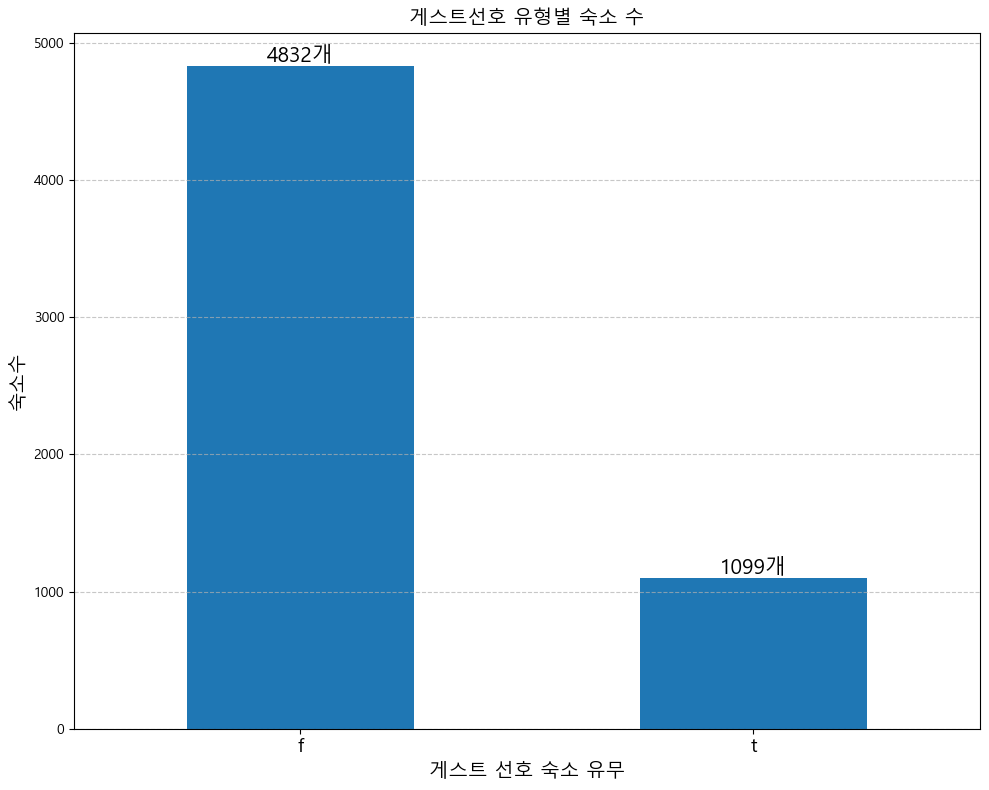

In [15]:
london_lists_20000['게스트선호'].value_counts().plot(kind='bar', figsize=(10,8))
for i, v in enumerate(london_lists_20000['게스트선호'].value_counts()):
    plt.text(i, v, str(v)+ "개", ha='center', va='bottom', fontsize=15)

plt.title('게스트선호 유형별 숙소 수',fontsize=14)
plt.xlabel('게스트 선호 숙소 유무',fontsize=14)
plt.ylabel('숙소수',fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [16]:
london_lists_20000.columns

Index(['숙소_id', '숙소_url', '호스트_id', '슈퍼호스트', '숙소_지역', '숙소_특징', '숙소_유형',
       '수용_인원수', '욕실수', '침실수', '침대수', '편의시설', '숙소_가격', '예약가능여부', '리뷰수',
       '12개월리뷰수', '30일리뷰수', '마지막리뷰', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수',
       '게스트선호'],
      dtype='object')

랜덤샘플 

- 숙소_정확성_리뷰점수    4.813839
- 숙소_체크인_리뷰점수    4.864104
- 숙소_소통_리뷰점수     4.881526

점수가 높음 <br>

리뷰점수 평균은 4.76

In [17]:
review_scores = london_lists_20000[['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']].mean().sort_values()
review_scores

숙소_가격_리뷰점수     4.705665
숙소_청결도_리뷰점수    4.743593
숙소_위치_리뷰점수     4.789174
숙소_정확성_리뷰점수    4.813839
숙소_체크인_리뷰점수    4.864104
숙소_소통_리뷰점수     4.881526
dtype: float64

In [18]:
london_lists_20000['리뷰점수'].mean()

4.762711178553364

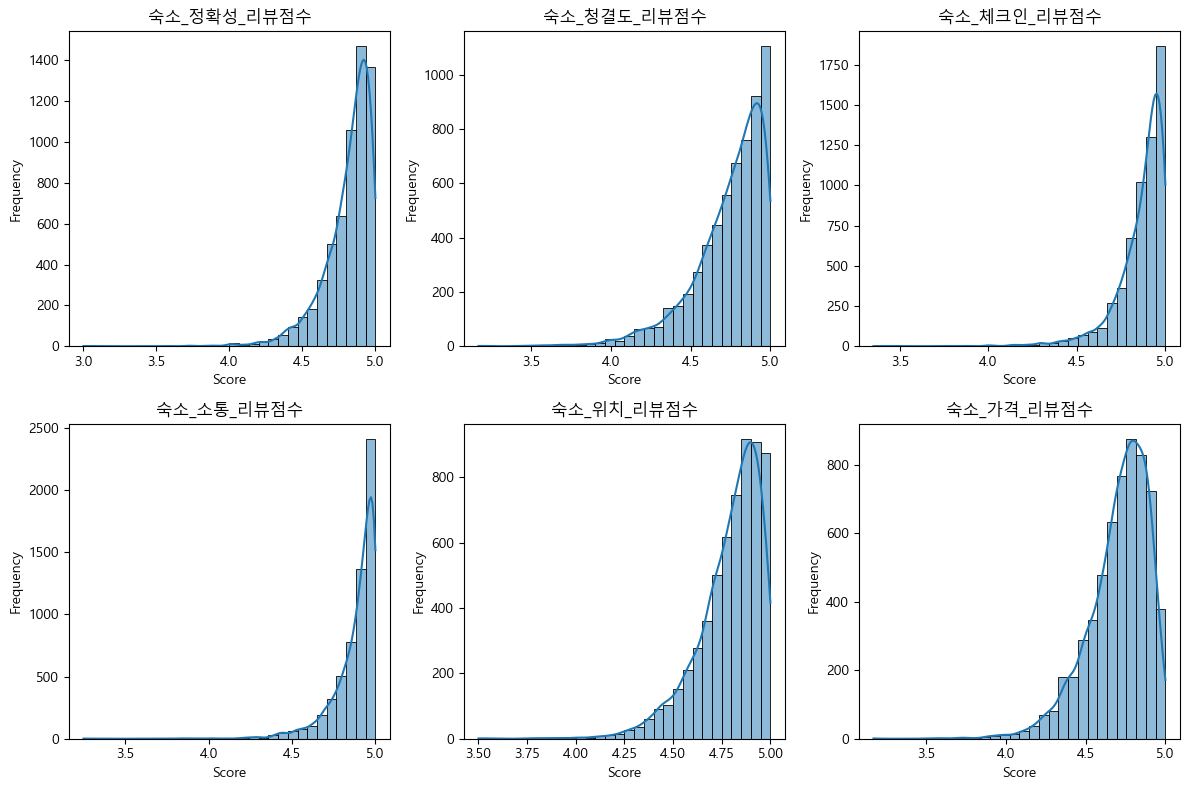

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 예시로 london_lists_20000을 생성합니다. 실제 데이터 프레임을 사용하세요.
# london_lists_20000 = pd.read_csv('path_to_your_file.csv')

# 리뷰 점수 컬럼 선택
review_scores = london_lists_20000[['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
                                    '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수',
                                    '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']]

# 각 리뷰 점수의 분포도 시각화
plt.figure(figsize=(12, 8))
for i, column in enumerate(review_scores.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(review_scores[column], bins=30, kde=True)
    plt.title(column)
    plt.xlabel('Score')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


리뷰점수 분포 확인

In [20]:
import plotly.express as px
import plotly.graph_objs as go


# '리뷰점수' 데이터 분포를 시각화
fig = px.histogram(london_lists_20000, x='리뷰점수', nbins=50, title='리뷰점수 분포')
fig.update_layout(bargap=0.2, 
                  width=800, # 그래프 크기 조정
                  height=500,
                  xaxis_title='리뷰점수',
                  yaxis_title='빈도')
fig.show()

침대침실욕실 분포<br>

- 침대수 2개
- 침실수 1개 
- 욕실수 1개 

In [30]:
review_scores = london_lists_20000[['욕실수','침실수','침대수']].mean()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


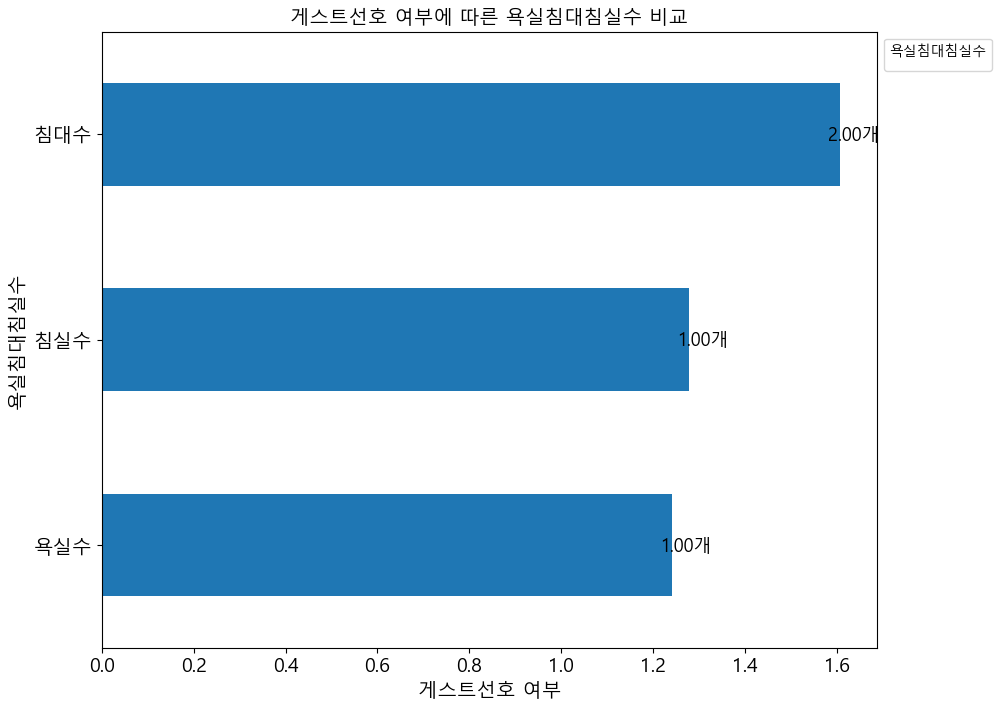

In [33]:
# 시각화
ax = review_scores.plot(kind='barh', figsize=(10, 8))
plt.title('게스트선호 여부에 따른 욕실침대침실수 비교',fontsize=14)
plt.xlabel('게스트선호 여부',fontsize=14)
plt.ylabel('욕실침대침실수', fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(rotation=0, fontsize=14)

plt.legend(title='욕실침대침실수', bbox_to_anchor=(1., 1), loc='upper left')

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{round(p.get_width(),0):.2f}개', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='center', va='center', xytext=(10, 0), textcoords='offset points', fontsize=13)
    
plt.show()

수용인원수 분포

In [21]:
import plotly.express as px
import plotly.graph_objs as go


# '리뷰점수' 데이터 분포를 시각화
fig = px.histogram(london_lists_20000, x='수용_인원수', nbins=50, title='수용인원수 분포')
fig.update_layout(bargap=0.2, 
                  width=800, # 그래프 크기 조정
                  height=500,
                  xaxis_title='수용인원수',
                  yaxis_title='빈도')
fig.show()

In [22]:
random_sample['리뷰날짜'] = random_sample['리뷰날짜'].dt.year

In [23]:
random_sample.groupby('숙소_id')['리뷰날짜'].value_counts()

숙소_id     리뷰날짜
13913     2011    1
          2013    1
15400     2011    1
17402     2014    2
          2018    1
                 ..
38999399  2022    3
39016057  2020    1
39025542  2022    1
39049983  2024    1
39057470  2022    1
Name: count, Length: 13861, dtype: int64

2019, 2022,2023년의 숙소수가 많이 샘플링 되었다

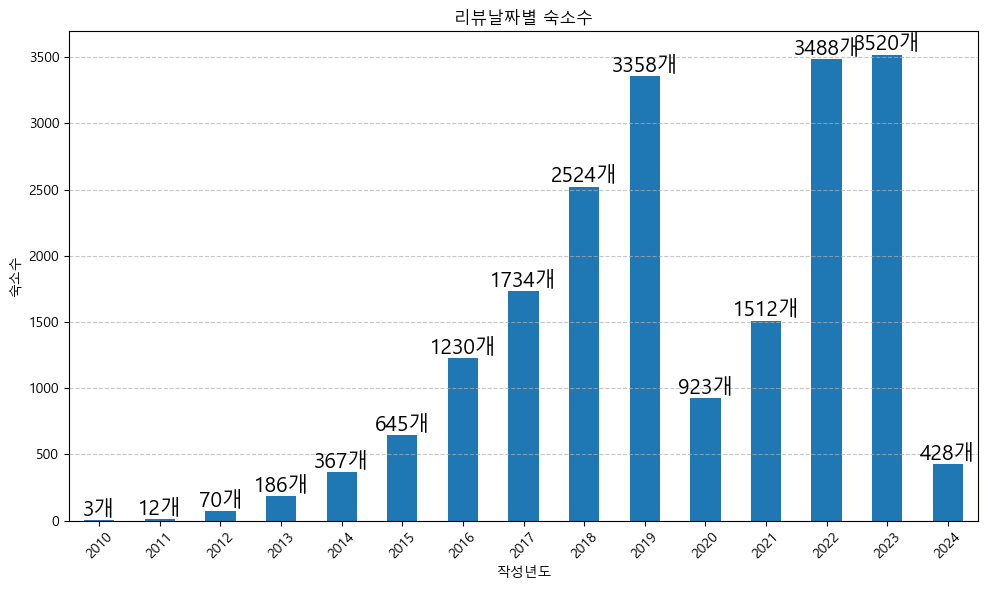

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

comments_by_year = random_sample.groupby('리뷰날짜')['숙소_id'].count()

for i, v in enumerate(comments_by_year):
    plt.text(i, v, str(v)+ "개", ha='center', va='bottom', fontsize=15)

comments_by_year.plot(kind='bar', figsize=(10, 6))
plt.title('리뷰날짜별 숙소수')
plt.xlabel('작성년도')
plt.ylabel('숙소수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

지역별 분포 

In [37]:
import plotly.express as px
import plotly.graph_objs as go

listing_area = london_lists_20000.groupby('숙소_지역').count()

# '리뷰점수' 데이터 분포를 시각화
fig = px.histogram(listing_area, x='숙소_id', nbins=50, title='수용인원수 분포')
fig.update_layout(bargap=0.2, 
                  width=800, # 그래프 크기 조정
                  height=500,
                  xaxis_title='수용인원수',
                  yaxis_title='빈도')
fig.show()

random_sample 분석

In [38]:
# !pip install textblob

import nltk
nltk.download('brown')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('conll2000')
nltk.download('movie_reviews')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Master\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Master\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Master\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Master\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Master\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Master\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already u

True

텍스트 전처리 


- 소문자로 변경 
- 토큰화 
- 불용어 제거 
- 어간 추출 


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob
import re  #정규표현식

from functools import reduce #2차원 >> 1차원

from nltk.tokenize import word_tokenize # word >> token
from nltk.corpus import stopwords  #stopwords >> 불용어
from nltk.stem import WordNetLemmatizer # 어간 분석

from collections import Counter

from wordcloud import STOPWORDS, WordCloud

stopWords = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

words = []
def Pretreatment(text):

    for title in random_sample['리뷰']:
        en_words = re.sub(r"[^a-zA-Z]+"," ",str(title)) #정규표현식 사용, 영문 대소문자 ^ 제외한 문자를 공백 (" ")변경
        en_words_token = word_tokenize(en_words.lower()) # 변환 된 단어를 토큰화
        en_words_stop = [word for word in en_words_token if not word in stopWords] # 불용어 제거
        en_words_lemma = [lemma.lemmatize(word) for word in en_words_stop]  #어간 추출
        words.append(en_words_lemma)

# #진행사항 표시
tqdm.pandas()


Pretreatment(random_sample['리뷰'])

In [42]:
word_list = list(reduce(lambda x, y: x + y, words))

In [43]:
word_list

['suzan',
 'excellent',
 'host',
 'lorinka',
 'professional',
 'manager',
 'flat',
 'extremely',
 'well',
 'situated',
 'west',
 'london',
 'surrey',
 'border',
 'mark',
 'place',
 'called',
 'hotel',
 'missed',
 'whole',
 'welcoming',
 'part',
 'real',
 'shame',
 'expensive',
 'place',
 'stay',
 'terrible',
 'communication',
 'wifi',
 'info',
 'missing',
 'room',
 'one',
 'answered',
 'message',
 'hour',
 'found',
 'owner',
 'detail',
 'downstairs',
 'repeatedly',
 'assured',
 'wrong',
 'password',
 'got',
 'sorted',
 'following',
 'day',
 'bed',
 'comfy',
 'clean',
 'lovely',
 'location',
 'though',
 'street',
 'noise',
 'loud',
 'carpet',
 'old',
 'extremely',
 'clean',
 'tidy',
 'homely',
 'guest',
 'house',
 'warm',
 'welcome',
 'helpful',
 'reliance',
 'good',
 'little',
 'noisy',
 'isabelle',
 'home',
 'quiet',
 'spacious',
 'everything',
 'need',
 'photo',
 'describe',
 'extremely',
 'accurate',
 'thank',
 'isabelle',
 'friend',
 'lovely',
 'stay',
 'peaceful',
 'spot',
 'notti

In [44]:
file_name = '../../../../data/Airbnb_London/20000_word_list.txt' 

with open(file_name, 'w+') as file :
    file.write('\n'.join(word_list))

In [60]:
pd.Series(word_list).value_counts().tail(10)

seal              1
recommandation    1
apreciated        1
tooth             1
instructing       1
pacnras           1
heed              1
zafer             1
everithing        1
beeping           1
Name: count, dtype: int64

In [53]:
# custom한 방식으로 불용어 설정
stopwords = "great nice good perfect stay"
stopwords = list(set(stopwords.split(" ")))
stopwords

['stay', 'perfect', 'great', 'good', 'nice']

In [59]:
word_list.remove(stopwords(0))

TypeError: 'list' object is not callable

In [ ]:
# from textblob import TextBlob

# def translate_to_english(text):
#     # TextBlob 객체 생성
#     blob = TextBlob(text)

#     # 언어 감지
#     detected_language = blob.detect_language()

#     # 감지된 언어가 영어인 경우 원본 텍스트 반환
#     if detected_language == 'en':
#         return text

#     # 번역
#     translated_blob = blob.translate(to='en')

#     return translated_blob.raw

# # 테스트를 위한 예시 텍스트
# example_text = "안녕하세요, 반갑습니다."

# # 언어 감지 및 번역
# translated_text = translate_to_english(example_text)

# print("원본 텍스트:", example_text)
# print("번역된 텍스트:", translated_text)


In [ ]:
# !pip install openai pandas tqdm
# !pip install openai==0.28

openai 코드

In [ ]:
# import openai
# import pandas as pd
# from tqdm import tqdm

# openai.api_key = 'api key 입력'

In [ ]:
# def translate_text(text):
#     response = openai.ChatCompletion.create(
#          model = 'gpt-3.5-turbo',
#          messages = [
#              {'role' : 'user', 'content' : f"이 리뷰를 영어로 번역해줘 : \n\n{text}"},

#             ],
#         max_tokens=100,
#         n=1,
#         stop=None,
#         temperature=0.5
#     )
#     translated_text = response.choices[0].message['content']
#     return translated_text

# #진행사항 표시
# tqdm.pandas()

# matching_rows['리뷰_영어'] = matching_rows['리뷰'].progress_apply(translate_text)




In [ ]:
# !pip install googletrans==4.0.0-rc1
# !pip install langdetect googletrans==4.0.0-rc1

구글 번역 api 제한 1일 16000자 까지 가능

In [ ]:
# from langdetect import detect
# from googletrans import Translator


# def translate_to_english(text):
#     # Google Translate 객체 생성
#     translator = Translator()

#     # 번역된 텍스트를 저장할 리스트
#     translated_texts = []

#     for t in text:
#         # 텍스트의 언어 감지
#         detected_language = detect(t)

#         # 감지된 언어가 영어인 경우 원본 텍스트를 저장
#         if detected_language == 'en':
#             translated_texts.append(t)
#         else:
#             # 번역
#             translation = translator.translate(t, src=detected_language, dest='en')
#             translated_texts.append(translation.text)

#     return translated_texts

# # 텍스트를 영어로 번역하여 '리뷰_영어' 열에 저장
# english_reviews = translate_to_english(matching_rows['리뷰'][:10])

파파고 api 제한 1일 최대 5000자

In [ ]:
# import requests

# def detect_language(text, client_id, client_secret):
#     # 파파고 API 호출을 위한 URL 및 요청 데이터 설정
#     url = ''
#     headers = {
#         'X-Naver-Client-Id': client_id,
#         'X-Naver-Client-Secret': client_secret
#     }
#     data = {'query': text}

#     # 파파고 API 호출
#     response = requests.post(url, headers=headers, data=data)

#     # 응답 확인 및 언어 감지 결과 반환
#     if response.status_code == 200:
#         detected_language = response.json()['langCode']
#         return detected_language
#     else:
#         print(f"언어 감지 중 오류 발생: {response.status_code}")
#         return None

# def translate_to_english(text, client_id, client_secret):
#     # 언어 감지
#     detected_language = detect_language(text, client_id, client_secret)

#     # 감지된 언어가 이미 영어인 경우 원본 텍스트 반환
#     if detected_language == 'en':
#         return text

#     # 파파고 API 호출을 위한 URL 및 요청 데이터 설정
#     url = ''
#     headers = {
#         'X-Naver-Client-Id': client_id,
#         'X-Naver-Client-Secret': client_secret
#     }
#     data = {
#         'source': detected_language,
#         'target': 'en',
#         'text': text
#     }

#     # 파파고 API 호출
#     response = requests.post(url, headers=headers, data=data)

#     # 응답 확인 및 번역 결과 반환
#     if response.status_code == 200:
#         translated_text = response.json()['message']['result']['translatedText']
#         return translated_text
#     else:
#         print(f"번역 중 오류 발생: {response.status_code}")
#         return None

# # 네이버 개발자 센터에서 발급받은 클라이언트 ID와 클라이언트 시크릿
# client_id = 'your_client_id'
# client_secret = 'your_client_secret'

# # 테스트를 위한 예시 텍스트
# example_text = "안녕하세요, 반갑습니다."

# # 언어 감지 및 번역
# translated_text = translate_to_english(example_text, client_id, client_secret)

# print("원본 텍스트:", example_text)
# print("번역된 텍스트:", translated_text)
